In [208]:
import numpy as np
from tqdm import tqdm_notebook 

import copy
import inspect
import time
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from pathlib import Path

BILLION = 10**9 + 0.0

def get_int_array(filename):    
    my_file = Path(filename)
#     if not my_file.exists():
#         exit(1)
#         return []
    N_big = 0
    mynumbers = []
    with open(filename) as f:
        for line in f:
            N_big += 1
            numerical = int(line)
            if numerical!=0:
                mynumbers.append(numerical)
    return mynumbers

def get_nano_time(file_times):
    nano_times = np.asarray(get_int_array(file_times))
    nano_times = nano_times[nano_times > 0]
    
    K = len(nano_times)
    nano_times = np.asarray(nano_times)
    diff_nano_times = nano_times[1:K] - nano_times[0:K - 1]
    return diff_nano_times

def append_refined_statistics(input_arrray, output_mean_set, output_std_set, output_refined_array = False):
#     input_arrray = np.asarray(input_arrray)#.reshape(-1)
    std_of_set = np.std(input_arrray)
    current_mean = np.mean(input_arrray)
    deviation_grade = std_of_set > np.abs(input_arrray - current_mean)
    
    output_std_set.append(std_of_set)
    if (np.sum(deviation_grade) < 1):        
        output_mean_set.append(current_mean)
    else:
        refined_array = input_arrray[deviation_grade]
        output_mean_set.append(np.mean(refined_array))
    if output_refined_array:
        return refined_array

In [2]:
def get_short_indexed_text_array_new(maxiter = 100): #Comparables/new
    short_indexed_text_array = []
    short_indexed_text_array.append("Initialization (malloc)") #_1_ !_
    short_indexed_text_array.append("G_x_fft_matvec for A*x0") #_2_ !_
    short_indexed_text_array.append("2D_to_1D for A*x0-x0") #_3_
    short_indexed_text_array.append("Norm(residual_vec)") #_4_
    short_indexed_text_array.append("Condition to iterate") #_5_ !_
    short_indexed_text_array.append("Residual_normalization & set_a,b") #_6_
    
    GMRES_i = 0
    
    if True:
        short_indexed_text_array.append("Memset(H, 0)") #_7_ !_
        short_indexed_text_array.append("G_x_fft_matvec for w=A*v iteration(" + str(GMRES_i) + ")") #_8_
        short_indexed_text_array.append("2D_to_1D for w=A*v iteration(" + str(GMRES_i) + ")") #_9_
        short_indexed_text_array.append("H_jk = (V_j, w) iteration(" + str(GMRES_i) + ")") #_10_
        short_indexed_text_array.append("w = w - H_jk * V_j iteration(" + str(GMRES_i) + ")") #_11_ !_    
        short_indexed_text_array.append("H_jj+1 = norm(w) iteration(" + str(GMRES_i) + ")") #_12_    
        short_indexed_text_array.append("1/H_jj+1 iteration(" + str(GMRES_i) + ")") #_13_    
        short_indexed_text_array.append("w = w/H_jj+1 iteration(" + str(GMRES_i) + ")") #_14_
        short_indexed_text_array.append("Set(J) iteration(" + str(GMRES_i) + ")") #_15_ !_
        short_indexed_text_array.append("Set(Jtotal)") #_16_ !_
        short_indexed_text_array.append("Update residual iteration(" + str(GMRES_i) + ")") #_17_ !_
        
        for GMRES_i in range(1, maxiter):  
            short_indexed_text_array.append("Condition_check iteration(" + str(GMRES_i) + ")") #_18_
            short_indexed_text_array.append("G_x_fft_matvec for w=A*v iteration(" + str(GMRES_i) + ")") #_19_        
            short_indexed_text_array.append("2D_to_1D for w=A*v iteration(" + str(GMRES_i) + ")") #_20_     
                
            for j in range(GMRES_i + 1):
                short_indexed_text_array.append("H_jk = (V_j, w) iteration(" + str(GMRES_i) + ", j = " + str(j) + ")") #_21_
                short_indexed_text_array.append("w = w - H_jk * V_j iteration(" + str(GMRES_i) + ", j = " + str(j) + ")") #_22_  
                   
                
            short_indexed_text_array.append("H_jj+1 = norm(w) iteration(" + str(GMRES_i) + ")") #_23_
            short_indexed_text_array.append("1/H_jj+1 iteration(" + str(GMRES_i) + ")") #_24_
            short_indexed_text_array.append("w = w/H_jj+1 iteration(" + str(GMRES_i) + ")") #_25_    
            short_indexed_text_array.append("H_temp=Jtotal * H iteration(" + str(GMRES_i) + ")") #_26_
            short_indexed_text_array.append("Set(J) iteration(" + str(GMRES_i) + ")") #_27_ !_
            short_indexed_text_array.append("Jtotal = J*Jtotal iteration(" + str(GMRES_i) + ")") #_28_
            short_indexed_text_array.append("Update residual iteration(" + str(GMRES_i) + ")") #_29_ !_
            
    GMRES_i += 1
    short_indexed_text_array.append("HH = Jtotal * H") #_30_
    short_indexed_text_array.append("cc <- Jtotal") #_31_
    short_indexed_text_array.append("Initialize_small_LES(HH, cc)") #_32_
    short_indexed_text_array.append("Process_small_LES(HH, cc)") #_33_
    
    for j in range(GMRES_i):        
        short_indexed_text_array.append("Add iteration(j = " + str(j) + ")") #_34_
        
    short_indexed_text_array.append("set(Output_p)") #_35_        
    short_indexed_text_array.append("Free in postprocessing") #_36_
    
    return short_indexed_text_array

In [41]:
residual_means_N = []
residual_stds_N = []

prefix = "/media/linux/4db3d51d-3503-451d-aff7-07e3ce95927e/Archive/Output/Nanotimes/time_"
for power in tqdm_notebook(range(8, 13)):
    times_means = []
    times_stds = []
    N = 2**power
    for maxiter in tqdm_notebook(range(3, 50)):
        residual_test = []
        for repetition in range(100):            
            residual_test.append(get_nano_time(prefix + str(N)
                                + "/times_" + str(maxiter * 100 + repetition) +  ".txt"))
            
        residual_test = np.asarray(residual_test)
        
        tick_means = []
        tick_stds = []
        for i in range(residual_test.shape[1]):
            append_refined_statistics(residual_test[:, i], tick_means, tick_stds)
            
        times_means.append(tick_means)
        times_stds.append(tick_stds)
        
        append_refined_statistics(residual_test, residual_means, residual_stds)
    residual_means_N.append(times_means)
    residual_stds_N.append(times_stds)
    
for power in tqdm_notebook([13]):
    times_means = []
    times_stds = []
    N = 2 ** power
    for maxiter in tqdm_notebook(range(3, 40)):
        residual_test = []
        for repetition in range(100):
            residual_test.append(get_nano_time(prefix + str(N) 
                                + "/times_" + str(maxiter * 100 + repetition) +  ".txt"))
            
        residual_test = np.asarray(residual_test)

        tick_means = []
        tick_stds = []
        for i in range(residual_test.shape[1]):
            append_refined_statistics(residual_test[:, i], tick_means, tick_stds)
            
        times_means.append(tick_means)
        times_stds.append(tick_stds)
            
    residual_means_N.append(times_means)
    residual_stds_N.append(times_stds)

In [60]:
sum_steps_means = []
sum_steps_stds = []
for i in range(len(residual_means_N[0][-1])):
    sum_steps_means.append(np.sum(residual_means_N[0][-1][:i]))
    sum_steps_stds.append(np.sum(residual_stds_N[0][-1][:i]))
    


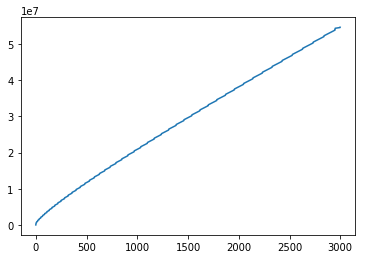

In [66]:
plt.plot(sum_steps_means)
plt.show()

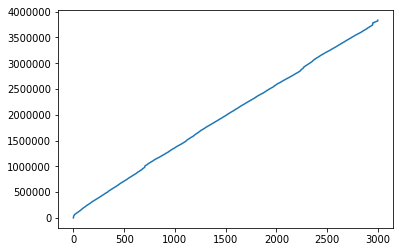

In [67]:
plt.plot(sum_steps_stds)
plt.show()

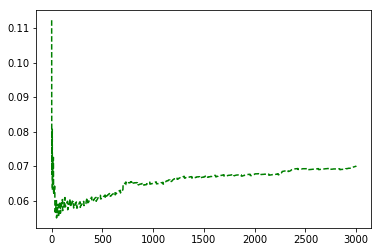

In [65]:

plt.plot(np.array(sum_steps_stds[1:])/np.array(sum_steps_means[1:]), 'g--')
plt.show()

In [650]:
residual_means_N = []
residual_stds_N = []

# folder = "/CUDA/GTX1080Ti/Nanotimes/"
folder = "/CUDA/V100/Nanotimes/"
# folder = "/MKL/"

prefix = "/media/linux/4db3d51d-3503-451d-aff7-07e3ce95927e/Archive/Output" + folder + "time_"
for power in tqdm_notebook(range(8, 13)):
    times_means = []
    times_stds = []
    N = 2**power
    for maxiter in tqdm_notebook(range(3, 50)):
        residual_test = []
        for repetition in range(100):            
            residual_test.append(get_nano_time(prefix + str(N)
                                + "/times_" + str(maxiter * 100 + repetition) +  ".txt"))
            
        residual_test = np.asarray(residual_test)
        
        tick_means = []
        tick_stds = []
        
        append_refined_statistics(np.sum(residual_test, axis = 1), tick_means, tick_stds)
            
        times_means.append(tick_means)
        times_stds.append(tick_stds)
        
        append_refined_statistics(residual_test, residual_means, residual_stds)
    residual_means_N.append(times_means)
    residual_stds_N.append(times_stds)
    
for power in tqdm_notebook([13]):
    times_means = []
    times_stds = []
    N = 2 ** power
    for maxiter in tqdm_notebook(range(3, 50)):
        residual_test = []
        for repetition in range(100):
            residual_test.append(get_nano_time(prefix + str(N) 
                                + "/times_" + str(maxiter * 100 + repetition) +  ".txt"))
            
        residual_test = np.asarray(residual_test)

        tick_means = []
        tick_stds = []
        append_refined_statistics(np.sum(residual_test, axis = 1), tick_means, tick_stds)
            
        times_means.append(tick_means)
        times_stds.append(tick_stds)
            
    residual_means_N.append(times_means)
    residual_stds_N.append(times_stds)

KeyboardInterrupt: 

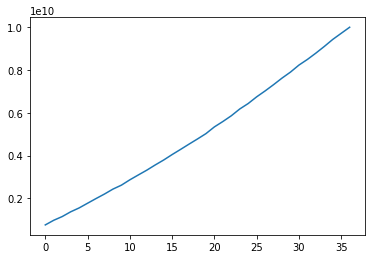

In [241]:
plt.plot(times_means)
plt.show()

In [275]:
i = 3
for elem in residual_means_N[0]:
    print(i)
    i +=1
i = 3  
for elem in residual_means_N[0]:
    if i >= 20:
        print(elem[0])
    i +=1

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
0.011482924
0.01226769
0.013243691
0.013912244
0.014758334
0.015594654
0.016612762
0.017496395
0.018359977
0.019421616
0.020402563
0.021296457
0.022334477
0.023556629
0.02454223
0.025752786
0.026928778
0.028077243
0.029255232
0.030486905
0.031833023
0.032840847
0.034158432
0.035586043
0.036882025
0.038402425
0.039549666
0.040940335
0.042696006
0.043960644


In [276]:
x = np.arange(3, 20)
y = 0.00000000119555276182 * np.power(x, 3) +0.00001221970546805284 * np.power(x, 2) +0.00027148610588412225 * x + 0.00120316915504758981

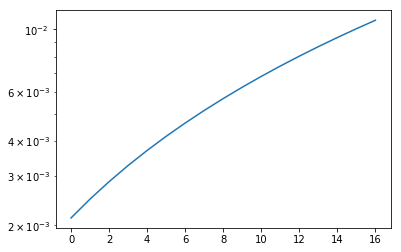

In [277]:
plt.semilogy(y)

In [239]:
import os
from shutil import copyfile
for i in range(1, 100):
    ref = 0
    
    for maxiter in tqdm_notebook(range(3, 50)):
        ref_file = prefix +str(N) + "/times_"+ str(maxiter * 100 + ref) + '.txt'
        
        check_file = prefix +str(N) + "/times_"+ str(maxiter * 100 + i) + '.txt'
        exists = os.path.isfile(check_file)
        if exists == 0:
            copyfile(ref_file, check_file)

In [6]:
# len(residual_means_N[0])

47

In [7]:
# short_indexed_text_array = get_short_indexed_text_array_new(maxiter = 45)
# file_times = "/home/linux/GMRES_timestamped_improved/times_4525.txt"
# nano_time = get_nano_time(file_times)
# second_time = nano_time/BILLION
# np.sum(second_time)

0.0

In [585]:
# for i in range(len(residual_means_N)):
#     residual_means_N[i] = np.asarray(residual_means_N[i]) / BILLION
#     residual_stds_N[i] = np.asarray(residual_stds_N[i]) / BILLION

In [ ]:
residual_stds_N[i] = np.asarray(residual_stds_N[i]) / BILLION

In [294]:
y.reshape(-1).shape

(17,)

SyntaxError: can't assign to function call (<ipython-input-296-d6e88566923a>, line 1)

In [300]:
# for i in range(17):
#     residual_means_N[0][0:17][i] = y[i]

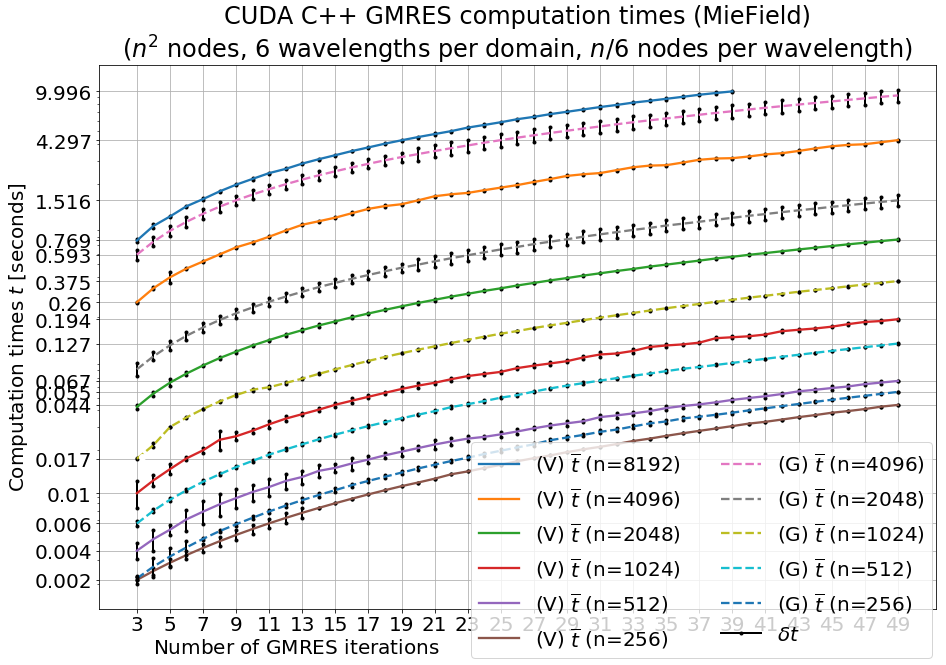

In [805]:
plt.figure(figsize=(15, 10))
title = "CUDA C++ GMRES computation times (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"

y_ticks = []

residual_means_N = copy.deepcopy(V100_mean_times)
residual_stds_N = copy.deepcopy(V100_std_times)

for power in tqdm_notebook(np.arange(8, 14)[::-1]):
    N = 2**power

    for i in range(len(residual_means_N[power - 8])):
        plt.plot([i + 3, i + 3], [residual_means_N[power - 8][i] - residual_stds_N[power - 8][i]/2, residual_means_N[power - 8][i] + residual_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], "-", label = "(V) $\overline{t}$ (n=" + str(N) + ")", linewidth = 2.3)

    y_ticks.append(residual_means_N[power - 8][-1][0])
    if power != 11 and power != 13:
        y_ticks.append(residual_means_N[power - 8][0][0])

residual_means_N = copy.deepcopy(GTX1080Ti_mean_times)
residual_stds_N = copy.deepcopy(GTX1080Ti_std_times)

for power in tqdm_notebook(np.arange(8, 13)[::-1]):
    N = 2**power

    for i in range(len(residual_means_N[power - 8])):
        plt.plot([i + 3, i + 3], [residual_means_N[power - 8][i] - residual_stds_N[power - 8][i]/2, residual_means_N[power - 8][i] + residual_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], "--", label = "(G) $\overline{t}$ (n=" + str(N) + ")", linewidth = 2.3)

    if power != 12:
        y_ticks.append(residual_means_N[power - 8][-1][0])
    if power != 8 and power != 11 and power != 13:
        y_ticks.append(residual_means_N[power - 8][0][0])
plt.plot([3, 3], [residual_means_N[0][0] - residual_stds_N[0][0]/2, residual_means_N[0][0] + residual_stds_N[0][0]/2], ".-", c="black", label = "$\delta t$", linewidth = 2)
plt.title(title, fontsize = font * 1.2)
plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.46, 0.37), ncol=2,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 50, 2), fontsize = font)
plt.yticks(y_ticks, np.round(y_ticks, 3).reshape(-1), fontsize = font)
plt.ylabel("Computation times $t$ [seconds]", fontsize = font)
plt.xlabel("Number of GMRES iterations $\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $ ", fontsize = font)
plt.grid(True)

plt.show()

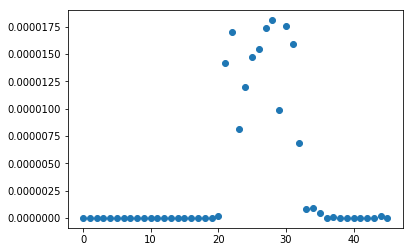

In [945]:
power = 8
plt.plot(residual_stds_N[power - 8], "o")
plt.show()

In [946]:
power = 8

In [958]:
# copy_cur = copy.deepcopy(residual_stds_N[power - 8])

mean_cur = np.median(copy_cur)
std = np.std(copy_cur)

for i in range(len(copy_cur)):
    if np.abs(copy_cur[i] - mean_cur) > std:
        print(1)
#         copy_cur[i] = (mean_cur + std) * np.random.random(1)
        copy_cur[i] = mean_cur + std * np.random.random(1)
        

1
1
1
1
1
1
1
1
1
1
1
1
1


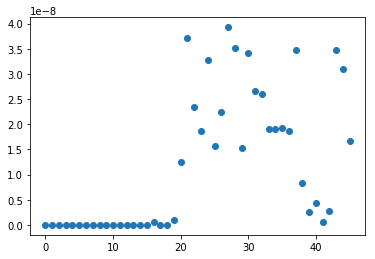

In [959]:
plt.plot(copy_cur, "o")
plt.show()

In [956]:
# for i in range(len(copy_cur)):
residual_stds_N[power - 8] = copy_cur

In [176]:
# import matplotlib.pyplot as plt
# from time import time

# font = 20




# plt.figure(figsize=(15, 10))
# for power in tqdm_notebook(range(8, 13)):
#     if power != 19:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], label = "means(n=" + str(N) + ")")
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_stds_N[power - 8], "--", label = "stds(n=" + str(N) + ")")
    
# plt.title("CUDA C++ GMRES computational times (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)", fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.9, 0.5),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(np.arange(3, 50, 2), fontsize = font)
# plt.yticks(fontsize = font)
# plt.show()

# plt.figure(figsize=(15, 10))
# for power in tqdm_notebook(range(8, 13)):
#     if power != 19:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_means_N[power - 8], label = "n=" + str(N))
    
# plt.title("GTX 1080 Ti CUDA C++ GMRES computational time means (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)", fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.9, 0.35),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(np.arange(3, 50, 2), fontsize = font)
# plt.ylabel("Computational time means [seconds]", fontsize = font)
# plt.xlabel("Number of GMRES iterations", fontsize = font)
# plt.grid(True)
# plt.yticks(fontsize = font)
# plt.show()

# plt.figure(figsize=(15, 10))
# title = "GTX 1080 Ti CUDA C++ GMRES computational time standart deviations (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"
# for power in tqdm_notebook(range(8, 13)):
#     if power != 19:
#         N = 2**power
#         plt.semilogy(np.arange(3, len(residual_means_N[power - 8]) + 3), residual_stds_N[power - 8], "--", label = "n=" + str(N))

# plt.title(title, fontsize = font * 1.2)
# plt.legend(bbox_to_anchor=(0.65, 0.5),
#            bbox_transform=plt.gcf().transFigure, fontsize = font)
# plt.xticks(np.arange(3, 50, 2), fontsize = font)
# plt.yticks(fontsize = font)
# plt.ylabel("Computational time standart devations [seconds]", fontsize = font)
# plt.xlabel("Number of GMRES iterations", fontsize = font)
# plt.grid(True)
# plt.show()
# # plt.savefig("CUDA C++ GMRES residuals"+'.%.5f.png' % time())

In [588]:
#saving
# V100_mean_times = copy.deepcopy(residual_means_N)
# V100_std_times = copy.deepcopy(residual_stds_N)

# MKL_mean_times = copy.deepcopy(residual_means_N)
# MKL_std_times = copy.deepcopy(residual_stds_N)


# GTX1080Ti_mean_times = copy.deepcopy(residual_means_N)
# GTX1080Ti_std_times = copy.deepcopy(residual_stds_N)

In [407]:
# residual_means_N = copy.deepcopy(V100_mean_times)
# residual_stds_N = copy.deepcopy(V100_std_times)

# residual_means_N = copy.deepcopy(GTX1080Ti_mean_times)
# residual_stds_N = copy.deepcopy(GTX1080Ti_std_times)

In [722]:
#compute speedup
CUDA_mean_time_array = copy.deepcopy(GTX1080Ti_mean_times)
CUDA_std_time_array = copy.deepcopy(GTX1080Ti_std_times)



speedup_means_N = []
speedup_stds_N = []


for power in tqdm_notebook(np.arange(8, 13)):
   
    speedup_mean = MKL_mean_times[power - 8][:len(CUDA_mean_time_array[power - 8])]/np.asarray(CUDA_mean_time_array[power - 8])
    speedup_std = (MKL_mean_times[power - 8][:len(CUDA_mean_time_array[power - 8])] * CUDA_std_time_array[power - 8] + CUDA_mean_time_array[power - 8] * MKL_std_times[power - 8][:len(CUDA_mean_time_array[power - 8])])/CUDA_mean_time_array[power - 8] ** 2

    speedup_means_N.append(speedup_mean)
    speedup_stds_N.append(speedup_std)

In [723]:
# V100_speedup_means = copy.deepcopy(speedup_means_N)
# V100_speedup_stds = copy.deepcopy(speedup_stds_N)

# GTX1080Ti_mean_times = copy.deepcopy(speedup_means_N)
# GTX1080Ti_speedup_stds = copy.deepcopy(speedup_stds_N)


In [719]:
GTX1080Ti_optimal_speedup_means

[17.959682181733655,
 30.471603441911554,
 43.861063819351386,
 30.662340039019746,
 34.20486177979814]

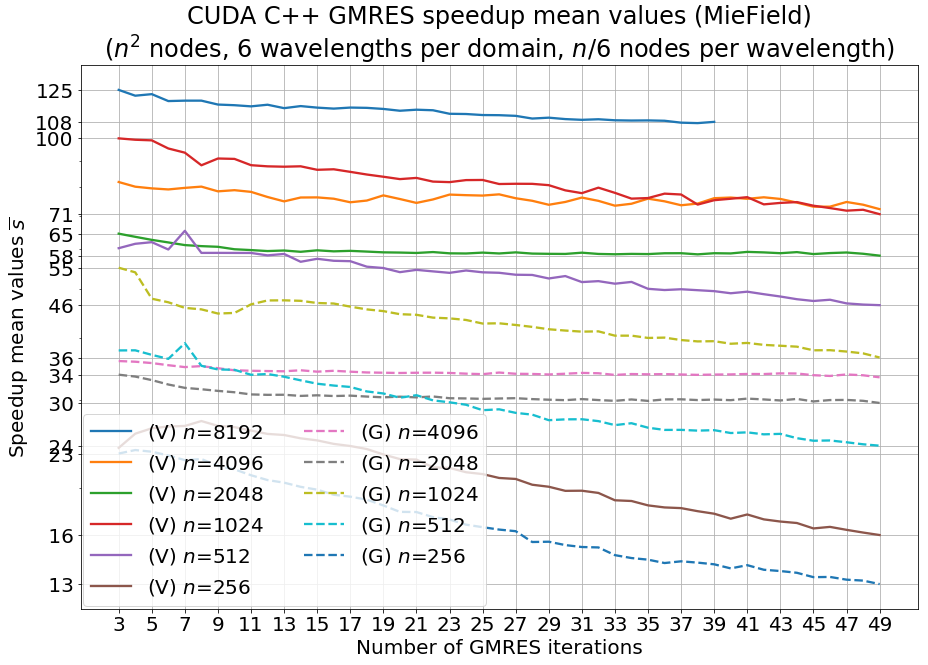

In [754]:
plt.figure(figsize=(15, 10))
title = "CUDA C++ GMRES speedup mean values (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"
y_ticks = []
y_ticks_view = []



# optimal_speedup_means = copy.deepcopy(GTX1080Ti_optimal_speedup_means)
# optimal_speedup_stds = copy.deepcopy(GTX1080Ti_optimal_speedup_stds)

# optimal_speedup_means = copy.deepcopy(V100_optimal_speedup_means)
# optimal_speedup_stds = copy.deepcopy(V100_optimal_speedup_stds)

speedup_means_N = copy.deepcopy(V100_speedup_means)
speedup_stds_N = copy.deepcopy(V100_speedup_stds)

for power in tqdm_notebook(np.arange(8, 14)[::-1]):
    N = 2**power

#     for i in range(len(speedup_means_N[power - 8])):
#         plt.plot([i + 3, i + 3], [speedup_means_N[power - 8][i] - speedup_stds_N[power - 8][i]/2, speedup_means_N[power - 8][i] + speedup_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(speedup_means_N[power - 8]) + 3), speedup_means_N[power - 8], "-", label = "(V) $n$=" + str(N), linewidth = 2.3)

    if power != 12:
        y_ticks.append(speedup_means_N[power - 8][-1][0])
        y_ticks_view.append('%3.f' % np.round(speedup_means_N[power - 8][-1]))
    if power != 8 and power != 9 and power != 12:
        y_ticks.append(speedup_means_N[power - 8][0][0])
        y_ticks_view.append('%3.f' % np.round(speedup_means_N[power - 8][0]))


speedup_means_N = copy.deepcopy(GTX1080Ti_mean_times)
speedup_stds_N = copy.deepcopy(GTX1080Ti_speedup_stds)
      

for power in tqdm_notebook(np.arange(8, 13)[::-1]):
    N = 2**power

#     for i in range(len(speedup_means_N[power - 8])):
#         plt.plot([i + 3, i + 3], [speedup_means_N[power - 8][i] - speedup_stds_N[power - 8][i]/2, speedup_means_N[power - 8][i] + speedup_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(speedup_means_N[power - 8]) + 3), speedup_means_N[power - 8], "--", label = "(G) $n$=" + str(N), linewidth = 2.3)

    if power != 12:
        y_ticks.append(speedup_means_N[power - 8][-1][0])
        y_ticks_view.append('%3.f' % np.round(speedup_means_N[power - 8][-1]))
    if power != 9 and power != 12:
        y_ticks.append(speedup_means_N[power - 8][0][0])
        y_ticks_view.append('%3.f' % np.round(speedup_means_N[power - 8][0]))
    
    
    
# plt.plot([3, 3], [speedup_mean[0, 0] - speedup_std[0, 0]/2, speedup_mean[0, 0] + speedup_std[0, 0]/2], ".-", c="black", label = "$\delta s$", linewidth = 2)
plt.title(title, fontsize = font * 1.2)
# plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.51, 0.41), ncol = 2,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 50, 2), fontsize = font)
plt.yticks(y_ticks, y_ticks_view, fontsize = font)
plt.ylabel("Speedup mean values $\overline{s}$", fontsize = font)
plt.xlabel("Number of GMRES iterations", fontsize = font)
plt.grid(True)

# plt.show()

In [751]:

# speedup_means_N = copy.deepcopy(V100_speedup_means)
# speedup_stds_N = copy.deepcopy(V100_speedup_stds)


0.24773192644185557
0.02438133693548646
0.2220488202077935
0.024884930182675458
0.07585114284665243
0.012321888268152378
0.09531613917027566
0.0200022141219089
0.14791626169853797
0.08383445686701518


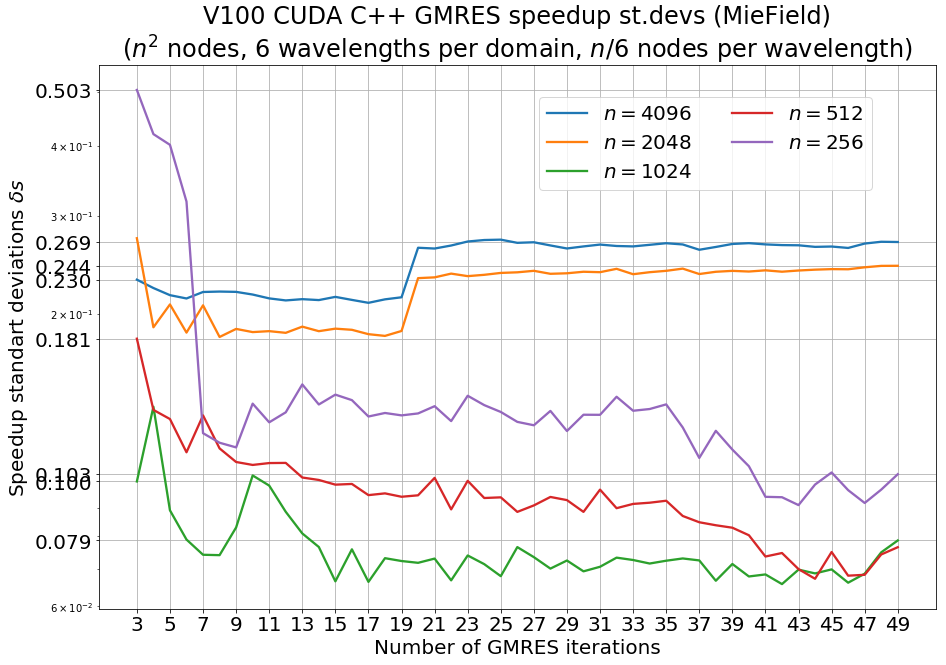

In [758]:
plt.figure(figsize=(15, 10))
title = "V100 CUDA C++ GMRES speedup st.devs (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"
y_ticks = []
y_ticks_view = []

for power in tqdm_notebook(np.arange(8, 13)[::-1]):
    N = 2**power

#     for i in range(len(speedup_means_N[power - 8])):
#         plt.plot([i + 3, i + 3], [speedup_means_N[power - 8][i] - speedup_stds_N[power - 8][i]/2, speedup_means_N[power - 8][i] + speedup_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2)

    plt.semilogy(np.arange(3, len(speedup_stds_N[power - 8]) + 3), speedup_stds_N[power - 8]/speedup_means_N[power - 8], "-", label = "$n=$" + str(N), linewidth = 2.3)

    if power != 9:
        y_ticks.append(speedup_stds_N[power - 8][-1][0]/speedup_means_N[power - 8][-1][0])
        y_ticks_view.append('%1.3f' % np.round(speedup_stds_N[power - 8][-1][0]/speedup_means_N[power - 8][-1][0], 3))
    if power != 11:
        y_ticks.append(speedup_stds_N[power - 8][0][0]/speedup_means_N[power - 8][0][0])
        y_ticks_view.append('%1.3f' % np.round(speedup_stds_N[power - 8][0][0]/speedup_means_N[power - 8][0][0], 3))
    
    print(np.mean(speedup_stds_N[power - 8]/speedup_means_N[power - 8]))
    print(np.std(speedup_stds_N[power - 8]/speedup_means_N[power - 8]))
    
    
# plt.plot([3, 3], [speedup_mean[0, 0] - speedup_std[0, 0]/2, speedup_mean[0, 0] + speedup_std[0, 0]/2], ".-", c="black", label = "$\delta s$", linewidth = 2)
plt.title(title, fontsize = font * 1.2)
# plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.85, 0.85), ncol = 2,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 50, 2), fontsize = font)
plt.yticks(y_ticks, y_ticks_view, fontsize = font)
plt.ylabel("Speedup standart deviations $\delta s$", fontsize = font)
plt.xlabel("Number of GMRES iterations", fontsize = font)
plt.grid(True)

plt.show()

In [660]:
optimal_speedup_means = []
optimal_speedup_stds  = []
for power in tqdm_notebook(np.arange(8, 14)):
    
    optimal_speedup_means.append(np.mean(speedup_means_N[power - 8][0:40]))
    optimal_speedup_stds.append(np.linalg.norm([np.std(speedup_means_N[power - 8][0:40]), np.mean(speedup_stds_N[power - 8][0:40])]))

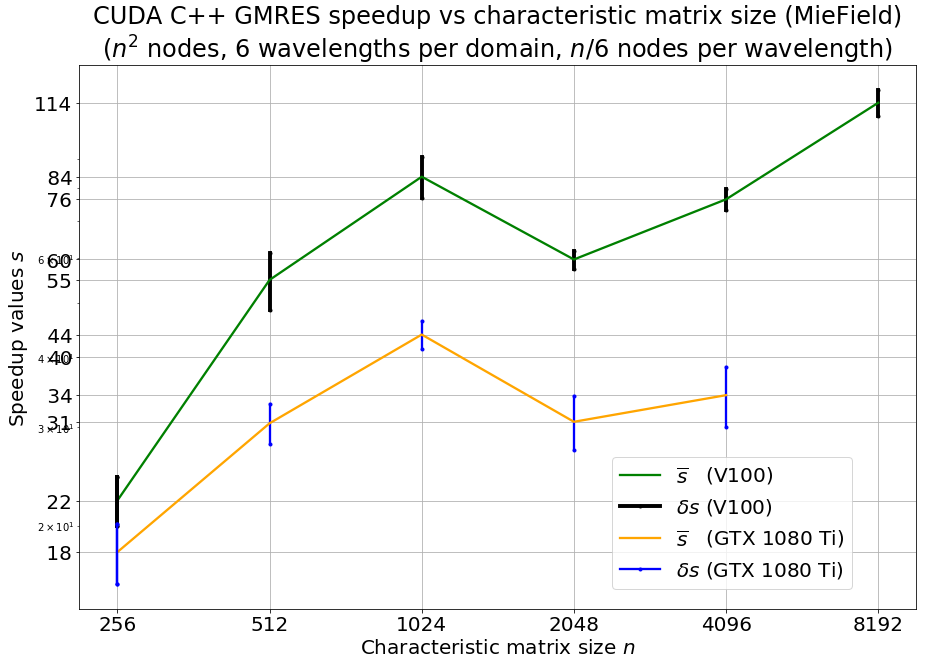

In [683]:
plt.close("all")
plt.figure(figsize=(15, 10))

title = "CUDA C++ GMRES speedup vs characteristic matrix size (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"
y_ticks = []
y_ticks_view = []


for i in range(len(optimal_speedup_means)):
    plt.plot([i, i], [optimal_speedup_means[i] - optimal_speedup_stds[i]/2, optimal_speedup_means[i] + optimal_speedup_stds[i]/2], ".-", c="black", linewidth = 3.9)

    if i != 111:
        y_ticks.append(optimal_speedup_means[i])
        y_ticks_view.append("%3.f" % np.round(optimal_speedup_means[i]))

plt.semilogy(optimal_speedup_means, "g-", label = "$\overline{s}$   (V100)", linewidth = 2.3)

plt.plot([0, 0], [optimal_speedup_means[0] - optimal_speedup_stds[0]/2, optimal_speedup_means[0] + optimal_speedup_stds[0]/2], ".-", c="black", label = "$\delta s$ (V100)", linewidth = 3.9)


for i in range(len(GTX1080Ti_optimal_speedup_means)):
    plt.plot([i, i], [GTX1080Ti_optimal_speedup_means[i] - GTX1080Ti_optimal_speedup_stds[i]/2, GTX1080Ti_optimal_speedup_means[i] + GTX1080Ti_optimal_speedup_stds[i]/2], ".-", c="blue", linewidth = 2.3)

    if i != 1:
        y_ticks.append(GTX1080Ti_optimal_speedup_means[i])
        y_ticks_view.append("%3.f" % np.round(GTX1080Ti_optimal_speedup_means[i]))

plt.plot(GTX1080Ti_optimal_speedup_means, "-", color = 'orange', label = "$\overline{s}$   (GTX 1080 Ti)", linewidth = 2.3)

plt.plot([0, 0], [GTX1080Ti_optimal_speedup_means[0] - GTX1080Ti_optimal_speedup_stds[0]/2, GTX1080Ti_optimal_speedup_means[0] + GTX1080Ti_optimal_speedup_stds[0]/2], ".-", c="blue", label = "$\delta s$ (GTX 1080 Ti)", linewidth = 2.3)



plt.title(title, fontsize = font * 1.2)
y_ticks = np.append(np.asarray(y_ticks).reshape(-1), np.arange(30, 30, 10).reshape(-1))
y_ticks = np.append(np.asarray(y_ticks).reshape(-1), np.arange(40, 50, 10).reshape(-1))

[y_ticks_view.append(str(elem)) if elem != 30 else [] for elem in np.arange(30, 50, 10)]
plt.yticks(y_ticks, y_ticks_view, fontsize = font)
# plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.85, 0.35), ncol = 1,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(len(optimal_speedup_means)), 2**np.arange(8, len(optimal_speedup_means)+8), fontsize = font)
plt.ylabel("Speedup values $s$", fontsize = font)
plt.xlabel("Characteristic matrix size $n$", fontsize = font)
plt.grid(True)

plt.show()

In [665]:
# GTX1080Ti_optimal_speedup_means = optimal_speedup_means
# GTX1080Ti_optimal_speedup_stds  = optimal_speedup_stds

# V100_optimal_speedup_means = optimal_speedup_means
# V100_optimal_speedup_stds  = optimal_speedup_stds

In [689]:
# tmporary = GTX1080Ti_optimal_speedup_means
# temporary = np.asarray(tmporary)

In [765]:
# GTX1080Ti_mean_times = np.load('numpy_savings/GTX1080Ti_mean_times.npy')
# GTX1080Ti_std_times = np.load('numpy_savings/GTX1080Ti_std_times.npy')

In [961]:
file_type = 'relative_errors'

In [962]:
prefix = '/home/linux/cuda-workspace/PyGMRES/numpy_savings/'
residual_means_N = []
residual_stds_N = []

for power in tqdm_notebook(range(8, 14)):
    times_means = []
    times_stds = []
    N = 2**power
    
    residual_test = []
    for repetition in range(100):            
        residual_test.append(np.asarray(np.load(prefix + file_type + '_' + 
                                     str(N) + '_' + str(repetition) + '.npy')))

    residual_test = np.asarray(residual_test)

    tick_means = []
    tick_stds = []

    for i in range(46):
        append_refined_statistics(residual_test[:, i], tick_means, tick_stds)

    residual_means_N.append(np.asarray(tick_means))
    residual_stds_N.append(np.asarray(tick_stds))

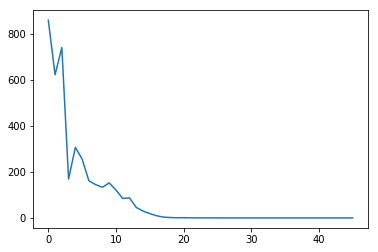

In [854]:
plt.plot(tick_means)

In [ ]:
residual_stds_N

In [826]:
# residual_means_N = np.asarray(residual_means_N)
# residual_stds_N = np.asarray(residual_stds_N)

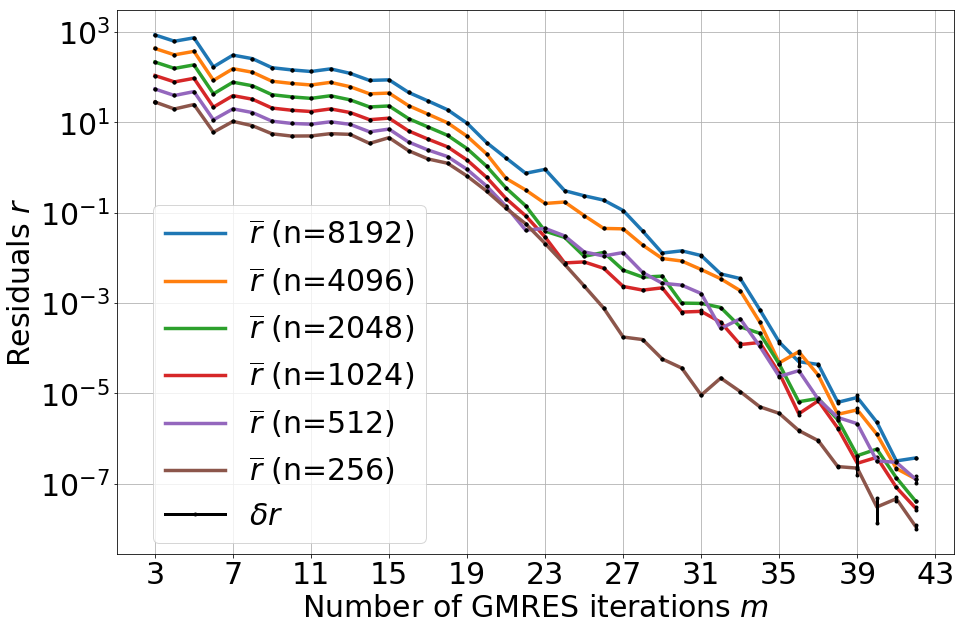

In [960]:
plt.close('all')
plt.figure(figsize=(15, 10))
title = "CUDA C++ GMRES computation times (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"

y_ticks = []
# font_old = (font / 2)
multiple = 1.5
font = font_old * 1.5

for power in tqdm_notebook(np.arange(8, 14)[::-1]):
    N = 2**power


    plt.semilogy(np.arange(3, 40 + 3), residual_means_N[power - 8][:40], "-", label = "$\overline{r}$ (n=" + str(N) + ")", linewidth = 2.3 * multiple)

    if power != 12:
        y_ticks.append(residual_means_N[power - 8][-1])
    if power != 8 and power != 11 and power != 13:
        y_ticks.append(residual_means_N[power - 8][0])
    for i in range(40):
        plt.plot([i + 3, i + 3], [residual_means_N[power - 8][i] - residual_stds_N[power - 8][i]/2, residual_means_N[power - 8][i] + residual_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2 * multiple)
        
plt.plot([3, 3], [residual_means_N[0][0] - residual_stds_N[0][0]/2, residual_means_N[0][0] + residual_stds_N[0][0]/2], ".-", c="black", label = "$\delta r$", linewidth = 2 * multiple)
# plt.title(title, fontsize = font * 1.2)
plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.425, 0.63), ncol=1,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 44, 4), fontsize = font)
plt.yticks(fontsize = font)
plt.ylabel("Residuals $r$", fontsize = font)
plt.xlabel("Number of GMRES iterations $m$", fontsize = font)
plt.grid(True)

plt.show()


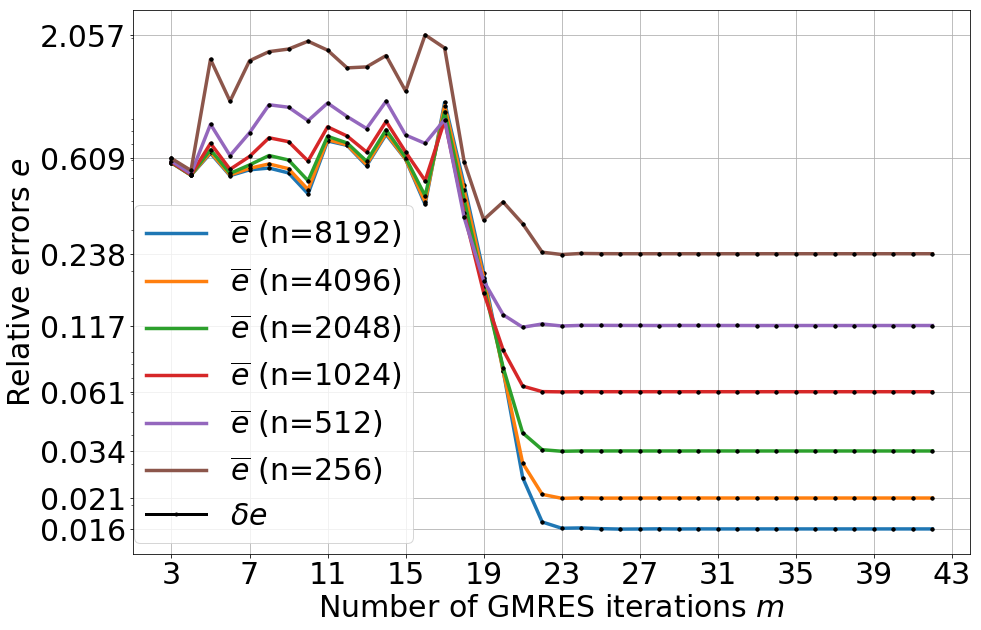

In [984]:
plt.close('all')
plt.figure(figsize=(15, 10))
title = "CUDA C++ GMRES computation times (MieField)\n($n^2$ nodes, 6 wavelengths per domain, $n/6$ nodes per wavelength)"

y_ticks = []
# font_old = (font / 2)
multiple = 1.5
font = font_old * 1.5

for power in tqdm_notebook(np.arange(8, 14)[::-1]):
    N = 2**power


    plt.semilogy(np.arange(3, 40 + 3), residual_means_N[power - 8][:40], "-", label = "$\overline{e}$ (n=" + str(N) + ")", linewidth = 2.3 * multiple)

    y_ticks.append(residual_means_N[power - 8][-1])
    if power == 8:
        y_ticks.append(residual_means_N[power - 8][0])
        y_ticks.append(np.max(residual_means_N[power - 8]))
        
    for i in range(40):
        plt.plot([i + 3, i + 3], [residual_means_N[power - 8][i] - residual_stds_N[power - 8][i]/2, residual_means_N[power - 8][i] + residual_stds_N[power - 8][i]/2], ".-", c="black", linewidth = 2 * multiple)
        
plt.plot([3, 3], [residual_means_N[0][0] - residual_stds_N[0][0]/2, residual_means_N[0][0] + residual_stds_N[0][0]/2], ".-", c="black", label = "$\delta e$", linewidth = 2 * multiple)
# plt.title(title, fontsize = font * 1.2)
plt.plot(3.3, 0.018, "o", color = "white")
plt.legend(bbox_to_anchor=(0.398, 0.63), ncol=1,
           bbox_transform=plt.gcf().transFigure, fontsize = font)
plt.xticks(np.arange(3, 44, 4), fontsize = font)
plt.yticks(y_ticks, np.round(y_ticks, 3), fontsize = font)
plt.ylabel("Relative errors $e$", fontsize = font)
plt.xlabel("Number of GMRES iterations $m$", fontsize = font)
plt.grid(True)

plt.show()
